<a href="https://colab.research.google.com/github/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_3/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from mpl_toolkits import mplot3d

from random import seed
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

## Defining Get Random Data

In [0]:
def get_random_data(w, b, mu, sigma, m):
    seed(1)
    
    data_split = (int)(m * 80/100)

    c = np.random.randint(0, 2, size=(m, 1))
    x_1 = np.random.uniform(size=(m, 1))
    n = np.random.normal(mu, sigma, size=(m, 1))

    x_2 = w * x_1 + b + (-1)**c * n

    data = np.concatenate((x_1, x_2), axis=1)
    labels = c

    return ((data[:data_split], labels[:data_split]), (data[data_split:], labels[data_split:]))

## Display scatterplot

In [0]:
def display_random_data(data, labels, w, b):
  colors = ['red', 'blue']
  plt.scatter(data[:,0].flatten(), data[:,1].flatten(), c=labels.flatten(), cmap=ListedColormap(colors))
  x = np.linspace(0, 1, 100)
  y = w * x + b
  plt.plot(x, y)

  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')

##Initializing 

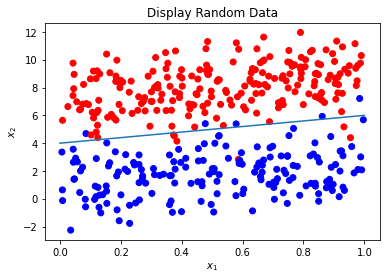

In [5]:
m = 500
w = 2
b = 4
mu = 3
sigma = 1.5
(train_data, train_labels), (test_data, test_labels) = get_random_data(w, b, mu, sigma, m)
display_random_data(train_data, train_labels, w, b)
plt.title('Display Random Data')
plt.show()

# Problem 2


In [6]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
import pandas as pd
from tensorflow.keras.layers import Dense
from keras import layers
import seaborn as sns

TensorFlow 2.x selected.


Using TensorFlow backend.


## Display heatmap

In [0]:
def display_heatmap(weights, bias):
  X_1r = np.linspace(0, 1)
  X_2r = np.linspace(-4, 15)
  X_1, X_2 = np.meshgrid(X_1r, X_2r)
  z = weights[0] * X_1 + weights[1] * X_2 + bias
  p = 1.0 / (1.0 + np.exp(np.negative(z)))
  plt.contourf(X_1, X_2, p, 100, cmap='bwr', alpha=0.5, zorder=-1)
  plt.colorbar()

In [0]:
# define sequential model
model = Sequential()
learning_rate = 0.01

model.add(Dense(1, activation='sigmoid', input_shape=(2, )))

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
epochs = 32
batch_size = 30
model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_data, test_labels));

##Extracting Weights and bias term 

In [10]:
for layer in model.layers:
  weights, bias = layer.get_weights() 
print("weights: "+ str(weights) +"\nbias:" + str(bias))

weights: [[ 2.3016112]
 [-0.8551577]]
bias:[2.4535322]


## Calculating the line to seperate the data using the trained model

$y = - \frac{w_1}{w_2}x + \frac{w_0}{w_2}$

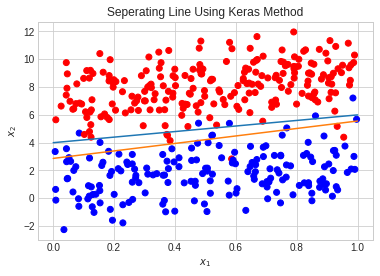

In [22]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

# Generating the seprating line
x_pred = np.linspace(0, 1, 100)
y_pred = - weights[0]/weights[1] * x_pred - bias/weights[1]

# Ploting
display_random_data(train_data, train_labels, w, b)

ax.plot(x_pred, y_pred, linestyle='-')
plt.title('Seperating Line Using Keras Method')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

## Display Heatmap for Keras Model

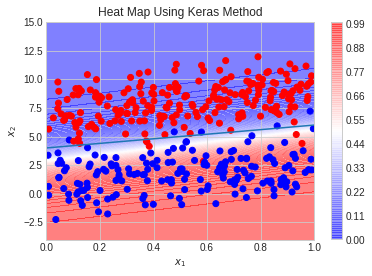

In [23]:
# Ploting
display_random_data(train_data, train_labels, w, b)
display_heatmap(weights, bias)
plt.title('Heat Map Using Keras Method')
plt.show()

# Problem 3

In [0]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

##Defining Functions

In [0]:
def sigmoid(z):
    return 1 / (1 + np.e**(-z))
    
def cross_entropy_loss(y, y_pred):
    return -y*np.log(y_pred) - (1 - y)*np.log(1 - y_pred)

def predict(z):
  return 1 if z > 0.5 else 0

def test_model(test_data, test_labels, W_b):
    correct_predictions = 0
    total_loss = 0
    for i in range(len(test_data)):
        # Process the input
        X_b = np.concatenate(([1], test_data[i]))
        z = W_b.T.dot(X_b)
        sig = sigmoid(z)
        # Make a prediction
        p = predict(sig)
        if p == test_labels[i]:
            correct_predictions += 1
        # Determine loss
        total_loss += cross_entropy_loss(test_labels[i], sig)

    # Return a summary
    return (total_loss[0] / len(test_data), correct_predictions / len(test_data))
 

## Defining the Model

In [0]:
def logistic_regression(train_data, train_labels, test_data, test_labels, epochs, learning_rate):
  W_b = np.random.random_sample((3, ))

  for epoch in range(epochs):
    for i in range(len(train_data)):
      X_b = np.concatenate(([1], train_data[i]))
      z = W_b.T.dot(X_b)
      sig = sigmoid(z)
      Lg_b = (sig - train_labels[i]) * X_b

      # Applying gradient to the weights
      W_b -= Lg_b * learning_rate
         
    loss, accuracy = test_model(test_data, test_labels, W_b)
    print(f'Epoch {epoch+1}/{epochs} - val_loss: {loss} - val_accuracy: {accuracy}')
    
  return W_b

In [0]:
epochs = 32
learning_rate = 0.01
W_b = logistic_regression(train_data, train_labels, test_data, test_labels, epochs, learning_rate);

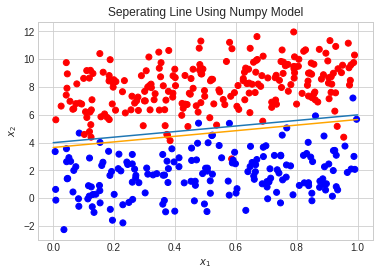

In [24]:
display_random_data(train_data, train_labels, w, b)

x = np.linspace(0, 1, 100)
y = -((W_b[1] * x + W_b[0])/W_b[2])
plt.title('Seperating Line Using Numpy Model')
plt.plot(x, y, color='orange')
plt.show()

## Display Heatmap for Numpy Model

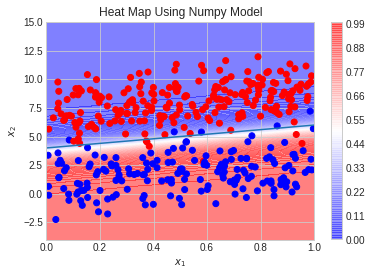

In [25]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

display_random_data(train_data, train_labels, w, b)
W_bb=W_b.reshape(3,1)
display_heatmap(W_bb[1:], W_bb[0])
plt.title('Heat Map Using Numpy Model')
plt.show()